<a href="https://colab.research.google.com/github/LeodeFaria/IDP/blob/main/idp_IA1_knn_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo
## Vamos classificar qual o esporte que as pessoas praticam de acordo com a altura e peso.

In [1]:
# Importando as bibliotecas
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Lendo os dados
url='https://github.com/4tune-ai/IDP/blob/main/data/athlete_events.csv?raw=true'

athlete_df = pd.read_csv(url)

In [7]:
# Vendo as colunas que serão utilizadas
athlete_df

,Unnamed: 0,Height,Weight,Sport
0,0,180.0,80.0,Basketball
1,167,185.0,72.0,Basketball
2,264,195.0,85.0,Basketball
3,346,189.0,85.0,Basketball
4,359,178.0,67.0,Basketball
...,...,...,...,...
25593,270644,188.0,161.0,Weightlifting
25594,270780,157.0,56.0,Weightlifting
25595,270891,162.0,52.0,Weightlifting
25596,270892,162.0,52.0,Weightlifting


In [12]:
# Removendo os dados nan
athlete_df.drop(columns='Unnamed: 0', inplace=True)
#athlete_df.columns

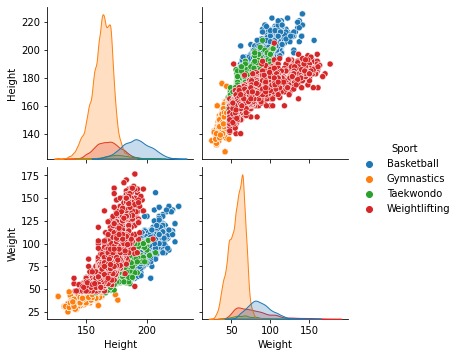

In [13]:
# Vendo a relação entre os pares 
sns.pairplot(athlete_df, hue='Sport')


In [14]:
# Fazendo o Scaling das features
scaler = StandardScaler()
scaler.fit(athlete_df.drop('Sport',axis=1))
scaled_features = scaler.transform(athlete_df.drop('Sport',axis=1))


In [16]:
# Dividindo em treino e teste
data_train, data_test, label_train, label_test = train_test_split(scaled_features,athlete_df['Sport'],
                                                    test_size=0.30)


In [17]:
# Criando o KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train,label_train)
pred = knn.predict(data_test)
print(classification_report(label_test,pred))


               precision    recall  f1-score   support

   Basketball       0.84      0.84      0.84      1067
   Gymnastics       0.93      0.93      0.93      5517
    Taekwondo       0.34      0.39      0.36       165
Weightlifting       0.75      0.75      0.75       931

     accuracy                           0.88      7680
    macro avg       0.72      0.73      0.72      7680
 weighted avg       0.88      0.88      0.88      7680



In [18]:
# Escolhendo o melhor valor para o k pela taxa de erro
error_rate = []
kmax=75
for i in range(1,kmax):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train,label_train)
    pred = knn.predict(data_test)
    error_rate.append(np.mean(pred != label_test))


Text(0, 0.5, 'Error Rate')

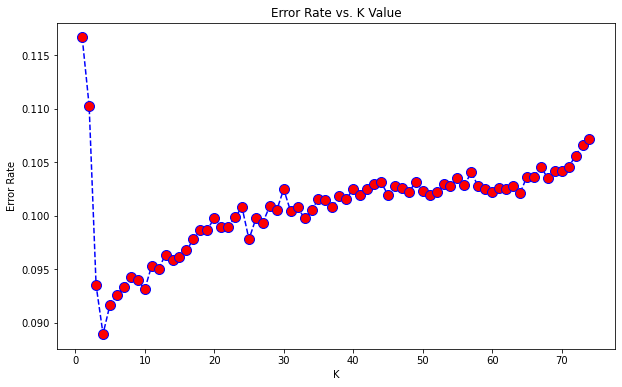

In [19]:
# Plotando a taxa de erro
plt.figure(figsize=(10,6))
plt.plot(range(1,kmax),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [20]:
# Posição do valor ideal
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train,label_train)
predict = knn.predict(data_test)
print(classification_report(label_test,predict))


               precision    recall  f1-score   support

   Basketball       0.88      0.86      0.87      1067
   Gymnastics       0.92      0.97      0.95      5517
    Taekwondo       0.40      0.22      0.28       165
Weightlifting       0.87      0.71      0.78       931

     accuracy                           0.91      7680
    macro avg       0.77      0.69      0.72      7680
 weighted avg       0.90      0.91      0.90      7680



In [ ]:
# Knn ideal
